<center>

# **Đồ án cuối kì**

# **Môn Lập trình cho khoa học dữ liệu**

## **Chủ đề: Các vụ án mạng ở Mỹ từ năm 2016 đến năm 2020**

</center>

<center>

# **Mục lục**

</center>

# **Các thư viện sử dụng**

In [834]:
# Libraries and Modules used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

---

# **Mô tả tập dữ liệu**

- Tập dữ liệu này được thu thập từ [**Murder Accountability Project**](https://www.murderdata.org/p/data-docs.html), do Thomas Hargrove sáng lập và công bố. Nhìn chung, tập dữ liệu mô tả về các vụ án giết người được xảy ra ở khắp mọi bang trên nước Mỹ từ năm 1976 đến năm 2020.

- Tập dữ liệu này là một tập dữ liệu mở được công bố dưới bản quyền [***Creative Commons CC-BY license***](https://creativecommons.org/licenses/by/4.0/), cho phép sử dụng không hạn chế dưới mọi hình thức, miễn là người dùng giữ nguyên tập dữ liệu gốc.

- Tập dữ liệu bao gồm những vụ án mạng được tổng hợp từ báo cáo của FBI và dữ liệu của Freedom of Information Act về các vụ án mạng không được báo cáo cho Justice Department.

- Do tập dữ liệu có kích cỡ quá lớn (khoảng 290MB) nên nhóm chúng em chỉ lọc lấy những vụ án từ năm 2016 đến năm 2020.

---

# **Tiền xử lý dữ liệu**

## Đọc dữ liệu vào Dataframe

In [835]:
homi_df = pd.read_csv('homicide.csv')
homi_df

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,201604266AL06201,"Tallapoosa, AL",AL06201,Alabama,Alexander City,Municipal police,MAP,Yes,2016,NaN,...,White,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,NaN,0,0,92517.0,Rural Alabama
1,201604265AL05003,"Marshall, AL",AL05003,Alabama,Arab,Municipal police,MAP,Yes,2016,NaN,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other negligent handling of gun,NaN,0,0,92517.0,Rural Alabama
2,201604529AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Other family,Other - not specified,NaN,0,0,92517.0,"Auburn-Opelika, AL"
3,201604593AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,NaN,0,0,92517.0,"Auburn-Opelika, AL"
4,201604594AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,NaN,0,0,92517.0,"Auburn-Opelika, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92086,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,WYOMIN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,NaN,2,0,83121.0,Rural Wyoming
92087,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,WYOMIN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,NaN,2,0,83121.0,Rural Wyoming
92088,202005001WY01101,"Laramie, WY",WY01101,Wyoming,Cheyenne,Municipal police,FBI,Yes,2020,WYOMIN,...,White,Not of Hispanic origin,"Firearm, type not stated",Other - known to victim,Other arguments,NaN,0,0,83121.0,"Cheyenne, WY"
92089,202005001WY01100,"Laramie, WY",WY01100,Wyoming,Laramie County,Sheriff,FBI,Yes,2020,WYOMIN,...,White,Hispanic origin,"Handgun - pistol, revolver, etc",Boyfriend,Other arguments,NaN,0,0,83121.0,"Cheyenne, WY"


## Số dòng và số cột của tập dữ liệu

In [836]:
row = homi_df.shape[0]
col = homi_df.shape[1]
print('Số dòng:', row)
print('Số cột', col)

Số dòng: 92091
Số cột 31


## Ý nghĩa của mỗi dòng

Mỗi dòng là thông tin của 1 vụ án bao gồm thời gian, địa điểm và thông tin liên quan đến nạn nhân và hung thủ.

## Kiểm tra các dòng bị trùng lắp

- Thực hiện xóa các dòng bị trùng lắp do trong đó có nhiều nạn nhân liên quan tới cùng 1 vụ án.

In [837]:
# homi_df = homi_df.drop_duplicates()

In [838]:
# duplicated = homi_df.duplicated()
# print('Số dòng bị trùng:', len(duplicated[duplicated==True]))

## Ý nghĩa của mỗi cột

In [839]:
des_df = pd.read_csv('description.csv')
pd.set_option('display.max_colwidth', None)
des_df

,Đặc trưng,Mô tả
0,ID,ID của vụ án
1,CNTYFIPS,Mã Federal Information Processing Standards (FIPS) cho bang và hạt của cơ quan hành pháp
2,Ori,Mã của cơ quan hành pháp
3,State,Tên bang
4,Agency,Tên cơ quan hành pháp
5,Agentype,Phân loại cơ quan hành pháp
6,Source,Nguồn thông tin
7,Solved,Vụ án có được phá tại thời điểm thực hiện báo cáo hay không
8,Year,Năm xảy ra vụ án
9,StateName,Tên bang


## Kiểm tra kiểu dữ liệu của các cột và điều chỉnh cho phù hợp

- Kiểm tra kiểu dữ liệu của từng cột

In [840]:
homi_df.dtypes

ID               object
CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
StateName        object
Month            object
Incident          int64
ActionType       object
Homicide         object
Situation        object
VicAge            int64
VicSex           object
VicRace          object
VicEthnic        object
OffAge            int64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount          int64
OffCount          int64
FileDate        float64
MSA              object
dtype: object

---

In [841]:
homi_df['StateName'].unique()

array([nan, 'FLA', 'ALABAM', 'ALASKA', 'ARIZON', 'ARKANS', 'CALIFO',
       'COLORA', 'CONNEC', 'DELAWA', 'FEDERA', 'DISTRI', 'FLORID',
       'GEORGI', 'HAWAII', 'IDAHO', 'ILLINO', 'INDIAN', 'IOWA', 'KANSAS',
       'KENTUC', 'LOUISI', 'MAINE', 'MARYLA', 'MASSAC', 'MICHIG',
       'MINNES', 'MISSIS', 'MISSOU', 'MONTAN', 'NEBRAS', 'NEVADA',
       'NEW HA', 'NEW JE', 'NEW ME', 'NEW YO', 'NORTH', 'OHIO', 'OKLAHO',
       'OREGON', 'PENNSY', 'RHODE', 'SOUTH', 'TENNES', 'TEXAS', 'UTAH',
       'VERMON', 'VIRGIN', 'WASHIN', 'WEST V', 'WISCON', 'WYOMIN'],
      dtype=object)

In [842]:
dtype = homi_df['StateName'].apply(lambda i: type(i))
dtype.unique()

array([<class 'float'>, <class 'str'>], dtype=object)

In [843]:
len(homi_df[homi_df['StateName'].isna()])

69623

- Ta thấy cột `StateName` chứa dữ liệu hỗn hợp với dữ liệu `nan` là float và tên các bang là string. Tuy nhiên có đến 69378 dòng là nan. Hơn nữa, tên bang cũng đã được lưu trong cột dữ liệu `State`. Cho nên, ta có thể xóa cột dữ liệu này (ở bước ***Xử lý các dòng bị thiếu dữ liệu***).

---

In [844]:
np.sort(homi_df['VicAge'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 999], dtype=int64)

- Ta thấy có những dòng mà tuổi của nạn nhân là 999. Ở đây, do kiểu dữ liệu của cột VicAge là số nguyên cho nên tác giả dùng 1 con số đặc biệt để biểu thị cho giá trị không biết của tuổi nạn nhân, cụ thể là 999. Việc này có thể xem bình thường cho nên không cần thay đổi gì cả.

---

In [845]:
np.sort(homi_df['OffAge'].unique())

array([  0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 999], dtype=int64)

- Đối với cột OffAge thì lý giải cũng tương tự như đối với cột VicAge.

---

In [846]:
homi_df['Subcircum'].unique()

array([nan, 'Felon killed in commission of a crime',
       'Felon attacked police officer', 'Felon attacked a civilian',
       'Not enough information to determine',
       'Felon attacked fellow police officer', 'Felon resisted arrest',
       'Felon attempted flight from a crime'], dtype=object)

In [847]:
dtype = homi_df['Subcircum'].apply(lambda i: type(i))
dtype.unique()

array([<class 'float'>, <class 'str'>], dtype=object)

- Ta thấy cột `Subcircum` cũng chứa dữ liệu hỗn hợp như cột StateName. Tuy nhiên, các dòng chứa dữ liệu khác `nan` có vai trò làm rõ cho hoàn cảnh gây án. Do đó, chúng ta sẽ không bỏ cột này đi, và thay các giá trị `nan` bằng `Not specified`.

In [848]:
len(homi_df[homi_df['Subcircum'].isna()])

87677

In [849]:
homi_df['Subcircum'].replace(np.nan, 'Not specified', inplace=True)

In [850]:
len(homi_df[homi_df['Subcircum'] == 'Not specified'])

87677

- Kiểm tra lại kiểu dữ liệu

In [851]:
new_dtype = homi_df['Subcircum'].apply(lambda i: type(i))
new_dtype.unique()

array([<class 'str'>], dtype=object)

---

In [852]:
homi_df['FileDate'].unique()

array([ 92517.,  11818.,  11317., 110716.,  33017.,  22717.,  51917.,
        71216.,  32117.,  82316.,  82416.,  91616., 112216.,  42617.,
        20317.,  31717.,  42117.,  81916., 101116.,  33117., 121417.,
        30217., 120516.,  41817.,  90717.,  71416.,  71816., 122316.,
       101316., 122917.,  82516.,  72116.,  32017.,  21517.,  71316.,
        92016., 122216.,  12317., 101216., 111716.,  41217.,  40717.,
        41117.,  12017.,  30817., 113016.,  91416.,  12717.,  22117.,
        81017.,  30117.,  72216., 111616.,  71916.,  81116., 121916.,
        51817.,  11117.,  80417.,  42717.,  50817.,  21216.,  31017.,
        40417.,  81417.,  20217.,  51117.,  51517.,  53017.,  42017.,
        30317.,  41317., 100716.,  32717.,  90616.,  22817.,  10317.,
       120616.,  72616.,  51217.,  51017.,  50417., 100616.,  42817.,
       120216.,  40517.,  82817.,  11217., 110816.,  50117.,  82317.,
       121917.,  91117., 110117.,  80416., 100316.,  80816.,  92116.,
        11717.,  216

In [853]:
len(homi_df[homi_df['FileDate'].isna()])

2510

- Ở đây, dữ liệu (khác `nan`) của mỗi dòng là dãy số tượng trưng cho ngày, tháng, năm của thời điểm thực hiện báo cáo về vụ án. Những dòng này đúng ra phải nên được chuyển về dang datetime. Tuy nhiên do tính liên quan đến vấn đề không được chặt chẽ lắm (thời điểm thực hiện báo cáo có thể không trùng với thời điểm gây án, và có thể chỉ là thời điểm được ước tính), nên ta có thể bỏ cột này đi (ở bước ***Xử lý các dòng bị thiếu dữ liệu***).

---

- Kiểm tra kiểu dữ liệu của tất cả các cột 1 lần nữa

In [854]:
homi_df.dtypes

ID               object
CNTYFIPS         object
Ori              object
State            object
Agency           object
Agentype         object
Source           object
Solved           object
Year              int64
StateName        object
Month            object
Incident          int64
ActionType       object
Homicide         object
Situation        object
VicAge            int64
VicSex           object
VicRace          object
VicEthnic        object
OffAge            int64
OffSex           object
OffRace          object
OffEthnic        object
Weapon           object
Relationship     object
Circumstance     object
Subcircum        object
VicCount          int64
OffCount          int64
FileDate        float64
MSA              object
dtype: object

- Kiểm tra lại toàn bộ tập dữ liệu

In [855]:
homi_df

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,201604266AL06201,"Tallapoosa, AL",AL06201,Alabama,Alexander City,Municipal police,MAP,Yes,2016,NaN,...,White,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,Not specified,0,0,92517.0,Rural Alabama
1,201604265AL05003,"Marshall, AL",AL05003,Alabama,Arab,Municipal police,MAP,Yes,2016,NaN,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other negligent handling of gun,Not specified,0,0,92517.0,Rural Alabama
2,201604529AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Other family,Other - not specified,Not specified,0,0,92517.0,"Auburn-Opelika, AL"
3,201604593AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,Not specified,0,0,92517.0,"Auburn-Opelika, AL"
4,201604594AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,NaN,...,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,Not specified,0,0,92517.0,"Auburn-Opelika, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92086,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,WYOMIN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,Not specified,2,0,83121.0,Rural Wyoming
92087,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,WYOMIN,...,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,Not specified,2,0,83121.0,Rural Wyoming
92088,202005001WY01101,"Laramie, WY",WY01101,Wyoming,Cheyenne,Municipal police,FBI,Yes,2020,WYOMIN,...,White,Not of Hispanic origin,"Firearm, type not stated",Other - known to victim,Other arguments,Not specified,0,0,83121.0,"Cheyenne, WY"
92089,202005001WY01100,"Laramie, WY",WY01100,Wyoming,Laramie County,Sheriff,FBI,Yes,2020,WYOMIN,...,White,Hispanic origin,"Handgun - pistol, revolver, etc",Boyfriend,Other arguments,Not specified,0,0,83121.0,"Cheyenne, WY"


---

In [856]:
homi_df['FileDate'].nunique()

389

## Tìm sự phân phối của các cột dữ liệu kiểu số

In [857]:
col_num = ['Year','Incident','VicAge','OffAge','VicCount','OffCount']

num_df = homi_df[col_num]

mising_percentage = (num_df.isna().sum() / row) * 100       # tỉ lệ giá trị bị thiếu
min_values = num_df.min()                                   # các giá trị nhỏ nhất
max_values = num_df.max()                                   # các giá trị lớn nhất

num_cols_distribution = pd.DataFrame(data = np.array((mising_percentage, min_values, max_values)),
                                                      columns = num_df.columns,
                                                      index = ['mising percentage', 'min', 'max'])
num_cols_distribution

,Year,Incident,VicAge,OffAge,VicCount,OffCount
mising percentage,0.0,0.0,0.0,0.0,0.0,0.0
min,2016.0,0.0,0.0,0.0,0.0,0.0
max,2020.0,999.0,999.0,999.0,21.0,40.0


## Tìm sự phân phối của các cột dữ liệu kiểu phân loại

In [858]:
cat_df = homi_df.copy().drop(columns=col_num)

mising_percentage = (cat_df.isna().sum() / row) * 100           # tỉ lệ giá trị bị thiếu
num_diff_vals = cat_df.apply(lambda col: col.nunique())         # số giá trị khác nhau
diff_vals = cat_df.apply(lambda col: col.dropna().unique())     # các giá trị khác nhau

cat_cols_distribution = pd.DataFrame(data = np.array((mising_percentage, num_diff_vals, diff_vals)),
                                     columns = cat_df.columns,
                                     index = ['mising percentage', 'num_diff_vals', 'diff_vals'])

pd.reset_option("display.max_colwidth")
cat_cols_distribution

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,StateName,Month,...,VicEthnic,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,FileDate,MSA
mising percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.602393,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.725565,0.0
num_diff_vals,86890,2384,7048,52,5589,8,2,2,51,12,...,3,3,6,3,17,29,32,8,389,408
diff_vals,"[201604266AL06201, 201604265AL05003, 201604529...","[Tallapoosa, AL, Marshall, AL, Lee, AL, Baldwi...","[AL06201, AL05003, AL04301, AL00500, AL00101, ...","[Alabama, Alaska, Arizona, Arkansas, Californi...","[Alexander City, Arab, Auburn, Baldwin County,...","[Municipal police, Sheriff, Primary state LE, ...","[MAP, FBI]","[Yes, No]","[FLA, ALABAM, ALASKA, ARIZON, ARKANS, CALIFO, ...","[April, August, December, February, January, J...",...,"[Unknown or not reported, Not of Hispanic orig...","[Male, Unknown, Female]","[White, Black, Unknown, Asian, American Indian...","[Unknown or not reported, Not of Hispanic orig...","[Firearm, type not stated, Handgun - pistol, r...","[Relationship not determined, Other family, Bo...","[Circumstances undetermined, Other negligent h...","[Not specified, Felon killed in commission of ...","[92517.0, 11818.0, 11317.0, 110716.0, 33017.0,...","[Rural Alabama, Auburn-Opelika, AL, Birmingham..."


## Xử lý các dòng bị thiếu dữ liệu

- Xóa các cột `StateName` và `FileDate` như đã đề cập ở bước ***Kiểm tra dữ liệu của các cột và điều chỉnh cho phù hợp***.

In [859]:
homi_df.drop(columns = ['StateName', 'FileDate'], inplace=True)

In [860]:
homi_df

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,MSA
0,201604266AL06201,"Tallapoosa, AL",AL06201,Alabama,Alexander City,Municipal police,MAP,Yes,2016,April,...,Male,White,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,Not specified,0,0,Rural Alabama
1,201604265AL05003,"Marshall, AL",AL05003,Alabama,Arab,Municipal police,MAP,Yes,2016,April,...,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other negligent handling of gun,Not specified,0,0,Rural Alabama
2,201604529AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,April,...,Male,Black,Unknown or not reported,"Firearm, type not stated",Other family,Other - not specified,Not specified,0,0,"Auburn-Opelika, AL"
3,201604593AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,April,...,Male,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,Not specified,0,0,"Auburn-Opelika, AL"
4,201604594AL04301,"Lee, AL",AL04301,Alabama,Auburn,Municipal police,MAP,Yes,2016,April,...,Male,Black,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Other - not specified,Not specified,0,0,"Auburn-Opelika, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92086,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,March,...,Male,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,Not specified,2,0,Rural Wyoming
92087,202003001WY01700,"Sheridan, WY",WY01700,Wyoming,Sheridan County,Sheriff,FBI,Yes,2020,March,...,Male,American Indian or Alaskan Native,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Sister,Brawl due to influence of alcohol,Not specified,2,0,Rural Wyoming
92088,202005001WY01101,"Laramie, WY",WY01101,Wyoming,Cheyenne,Municipal police,FBI,Yes,2020,May,...,Male,White,Not of Hispanic origin,"Firearm, type not stated",Other - known to victim,Other arguments,Not specified,0,0,"Cheyenne, WY"
92089,202005001WY01100,"Laramie, WY",WY01100,Wyoming,Laramie County,Sheriff,FBI,Yes,2020,May,...,Female,White,Hispanic origin,"Handgun - pistol, revolver, etc",Boyfriend,Other arguments,Not specified,0,0,"Cheyenne, WY"


---

# **Phân tích dữ liệu**

## **Câu hỏi số 1**

### **Các loại hung khí nào được sử dụng nhiều trong các vụ án qua các năm?**

- Từ việc trả lời câu hỏi này, ta có thể đề ra những phương án xử lý đối với từng loại hung khí cụ thể bằng cách thắt chặt quản lý việc sử dụng và tàng trữ chúng, cũng như là ban hành các quy định pháp lý có liên quan...

### Tiền xử lý

In [861]:
duplicated = homi_df['ID'].duplicated()
duplicated = duplicated[duplicated==True].index
homi_df_unique = homi_df.drop(duplicated, axis = 0).reset_index()

### Phân tích

In [862]:
weapon_df = homi_df_unique[['ID', 'Year', 'Weapon']].copy()
count = pd.DataFrame(weapon_df.groupby(['Year', 'Weapon']).size().rename('Count')).reset_index()

top_3_weapon = count.groupby('Year').apply(lambda x: x.nlargest(3, 'Count')).reset_index(drop=True)
top_3_weapon

,Year,Weapon,Count
0,2016,"Handgun - pistol, revolver, etc",8000
1,2016,"Firearm, type not stated",3614
2,2016,Knife or cutting instrument,1737
3,2017,"Handgun - pistol, revolver, etc",8072
4,2017,"Firearm, type not stated",3694
5,2017,Knife or cutting instrument,1770
6,2018,"Handgun - pistol, revolver, etc",7546
7,2018,"Firearm, type not stated",3441
8,2018,Knife or cutting instrument,1660
9,2019,"Handgun - pistol, revolver, etc",7094


- Ta thấy các loại hung khí được sử dụng nhiều nhất trong các vụ án qua các năm đều là 
    - `Handgun - pistol, revolver, etc	`
    - `Firearm, type not stated`
    - `Knife or cutting instrument`.

- Do đó, ta tiếp tục tìm ra số vụ án qua các năm của từng loại hung khí.

In [863]:
handgun = top_3_weapon[top_3_weapon['Weapon'] == 'Handgun - pistol, revolver, etc'].drop('Weapon', axis = 1)
firearm = top_3_weapon[top_3_weapon['Weapon'] == 'Firearm, type not stated'].drop('Weapon', axis = 1)
knife = top_3_weapon[top_3_weapon['Weapon'] == 'Knife or cutting instrument'].drop('Weapon', axis = 1)

In [901]:
handgun

,Year,Count
0,2016,8000
3,2017,8072
6,2018,7546
9,2019,7094
12,2020,8778


In [902]:
firearm

,Year,Count
1,2016,3614
4,2017,3694
7,2018,3441
10,2019,3609
13,2020,5228


In [903]:
knife

,Year,Count
2,2016,1737
5,2017,1770
8,2018,1660
11,2019,1583
14,2020,1850


### Trực quan hóa

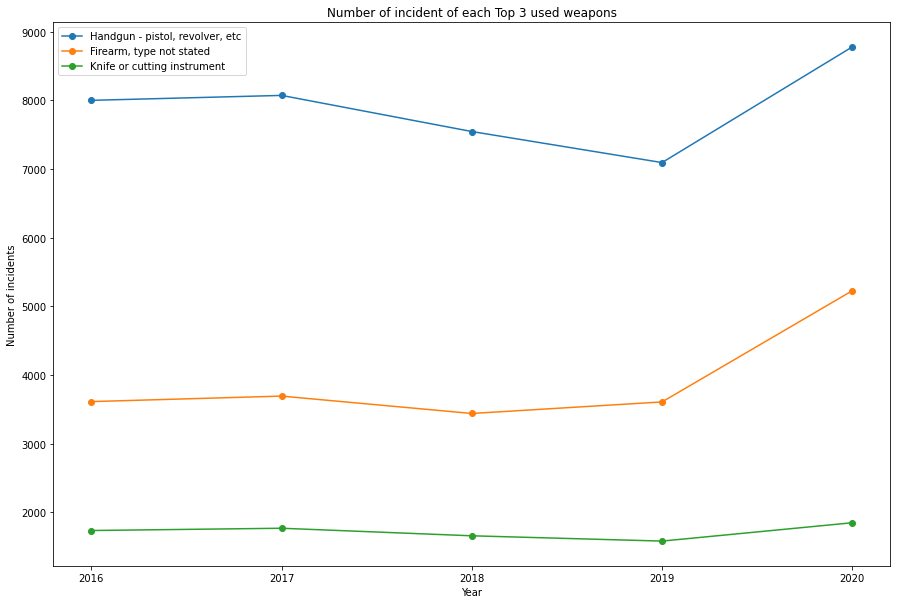

In [864]:
plt.figure(figsize=(15,10))

plt.plot(handgun['Year'], handgun['Count'], marker = 'o', label = 'Handgun - pistol, revolver, etc')
plt.plot(firearm['Year'], firearm['Count'], marker = 'o', label = 'Firearm, type not stated')
plt.plot(knife['Year'], knife['Count'], marker = 'o', label = 'Knife or cutting instrument')

plt.title('Number of incident of each Top 3 used weapons')
plt.xticks(handgun['Year'])
plt.xlabel('Year')
plt.ylabel('Number of incidents')
plt.legend()
plt.show()

### Trả lời câu hỏi

- Quan sát từ biểu đồ trên, ta thấy số vụ án liên quan đến súng (`Handgun` và `Firearm`) nhiều hơn rất nhiều so với các vụ án liên quan đến dao, các hung khí sắc bén nói riêng và các hung khí còn lại nói chung. Hơn nữa chiều hướng các vụ án mạng sử dụng súng ngày càng tăng qua các năm. Điều này đặt ra 1 mối quan ngại cho các nhà chức trách ở Mỹ rằng liệu có nên cho người dân tùy ý sử dụng súng ống đạn dược nữa hay không. Nhiều người trong số họ có thể sẽ có những nhận định trái chiều, tuy nhiên để cải thiện vấn đề này ở Mỹ thì dường như câu trả lời không thể là "Có" được. Các cơ quan lập pháp và hành pháp cần phải đặt nặng vấn đề và kiểm soát nghiêm ngặt hơn việc tàng trữ và sử dụng súng của người dân.

---

## **Câu hỏi số 2**

###  **Tìm mô hình dự đoán một vụ án sử dụng súng có được giải quyết hay không?**

- Từ việc tìm ra mô hình này, cảnh sát có thể dựa vào đó để đưa ra các biện pháp đối phó phù hợp đối với các vụ án cụ thể.

### Tiền xử lý

In [865]:
gun_weapon = ['Other gun', 'Shotgun', 'Rifle', 'Firearm, type not stated', 'Handgun - pistol, revolver, etc']
gun_df = homi_df[['State', 'Month', 'Year', 'VicAge', 'VicSex', 'VicRace', 'Weapon', 'Solved']][homi_df['Weapon'].isin(gun_weapon)]
gun_df

,State,Month,Year,VicAge,VicSex,VicRace,Weapon,Solved
0,Alabama,April,2016,49,Male,Black,"Firearm, type not stated",Yes
1,Alabama,April,2016,49,Female,White,"Handgun - pistol, revolver, etc",Yes
2,Alabama,April,2016,43,Male,Black,"Firearm, type not stated",Yes
3,Alabama,April,2016,23,Male,Black,"Firearm, type not stated",Yes
4,Alabama,April,2016,25,Male,Black,"Firearm, type not stated",Yes
...,...,...,...,...,...,...,...,...
92086,Wyoming,March,2020,51,Female,American Indian or Alaskan Native,"Handgun - pistol, revolver, etc",Yes
92087,Wyoming,March,2020,25,Male,American Indian or Alaskan Native,"Handgun - pistol, revolver, etc",Yes
92088,Wyoming,May,2020,36,Male,White,"Firearm, type not stated",Yes
92089,Wyoming,May,2020,39,Male,White,"Handgun - pistol, revolver, etc",Yes


- Để có thể huấn luyện được trên mô hình phân lớp, ta cần chuyển các cột dữ liệu phân loại về dạng số bằng dummy encoding.

In [866]:
prefix_dict = {
    'State': 'State_is',
    'Month': 'Month_is',
    'Year' : 'Year_is',
    'VicSex' : 'VicSex_is',
    'VicRace' : 'VicRace_is',
    'Weapon' :  'Weapon_is'
}

feature_df = pd.get_dummies(gun_df, prefix = prefix_dict, columns = prefix_dict.keys())
feature_df = feature_df.sample(frac=1, random_state=0)
feature_df.reset_index(inplace=True)
feature_df = feature_df.drop('index', axis = 1)
feature_df

,VicAge,Solved,State_is_Alabama,State_is_Alaska,State_is_Arizona,State_is_Arkansas,State_is_California,State_is_Colorado,State_is_Connecticut,State_is_Delaware,...,VicRace_is_Asian,VicRace_is_Black,VicRace_is_Native Hawaiian or Pacific Islander,VicRace_is_Unknown,VicRace_is_White,"Weapon_is_Firearm, type not stated","Weapon_is_Handgun - pistol, revolver, etc",Weapon_is_Other gun,Weapon_is_Rifle,Weapon_is_Shotgun
0,15,No,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,40,Yes,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,46,Yes,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,33,Yes,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,33,Yes,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67261,26,Yes,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
67262,25,Yes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
67263,32,Yes,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
67264,32,No,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


- Chia tập dữ liệu hiện tại ra thành tập huấn luyện và tập kiểm tra với tỉ lệ 8:2

In [867]:
X_df = feature_df.drop('Solved', axis = 1).values
y_sr = feature_df['Solved'].values
X_train, X_test, y_train, y_test = train_test_split(X_df, y_sr, test_size=0.2, random_state=0)

- Để giúp tối ưu hóa mô hình phân lớp, ta chuẩn hóa các cột dữ liệu bằng StandardScaler (đối với mỗi phần tử của mỗi cột, trừ cho trung bình và sau đó chia cho độ lệch chuẩn của cột đó).

In [868]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.06588284, -0.14079549, -0.05873461, ..., -0.10365231,
        -0.19621641, -0.146125  ],
       [-0.01006943, -0.14079549, -0.05873461, ..., -0.10365231,
         5.0964138 , -0.146125  ],
       [-0.1872914 , -0.14079549, -0.05873461, ..., -0.10365231,
        -0.19621641, -0.146125  ],
       ...,
       [-0.0860217 , -0.14079549, -0.05873461, ..., -0.10365231,
        -0.19621641, -0.146125  ],
       [-0.27590239, -0.14079549, -0.05873461, ..., -0.10365231,
        -0.19621641, -0.146125  ],
       [-0.25058497, -0.14079549, -0.05873461, ..., -0.10365231,
        -0.19621641, -0.146125  ]])

In [869]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.51938773, -0.13533914, -0.05322066, ..., -0.10618288,
        -0.19727878, -0.14525484],
       [-0.09609249, -0.13533914, -0.05322066, ...,  9.41771381,
        -0.19727878, -0.14525484],
       [ 0.03089608, -0.13533914, -0.05322066, ..., -0.10618288,
        -0.19727878, -0.14525484],
       ...,
       [-0.30774011, -0.13533914, -0.05322066, ..., -0.10618288,
        -0.19727878, -0.14525484],
       [-0.11020233, -0.13533914, -0.05322066, ..., -0.10618288,
        -0.19727878, -0.14525484],
       [-0.12431217, -0.13533914, -0.05322066, ..., -0.10618288,
         5.06896878, -0.14525484]])

### Phân tích

- Ở đây, ta sẽ thực hiện `fine tuning` để tìm ra hệ số cho ra mô hình tốt nhất.
- Trước tiên, khởi tạo dictionary chứa các hệ số và các giá trị của chúng.

In [870]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators": [5, 10, 50, 100, 250],
    'max_depth': [2, 4, 6, 8, 16, 32, None]
}

- Huấn luyện mô hình trên từng bộ tham số ở trên

In [871]:
# cv = GridSearchCV(rfc, parameters, cv = 5)
# cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

- Tìm ra bộ tham số cho ra mô hình tốt nhất

In [900]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean, 3)} + or -{round(std, 3)} for the {params}')

    return results.best_params_['n_estimators'], results.best_params_['max_depth']

best_n_estimator, best_max_depth = display(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 250}


0.633 + or -0.009 for the {'max_depth': 2, 'n_estimators': 5}
0.636 + or -0.009 for the {'max_depth': 2, 'n_estimators': 10}
0.625 + or -0.0 for the {'max_depth': 2, 'n_estimators': 50}
0.625 + or -0.0 for the {'max_depth': 2, 'n_estimators': 100}
0.625 + or -0.0 for the {'max_depth': 2, 'n_estimators': 250}
0.643 + or -0.008 for the {'max_depth': 4, 'n_estimators': 5}
0.644 + or -0.01 for the {'max_depth': 4, 'n_estimators': 10}
0.649 + or -0.007 for the {'max_depth': 4, 'n_estimators': 50}
0.649 + or -0.004 for the {'max_depth': 4, 'n_estimators': 100}
0.647 + or -0.003 for the {'max_depth': 4, 'n_estimators': 250}
0.658 + or -0.003 for the {'max_depth': 6, 'n_estimators': 5}
0.659 + or -0.005 for the {'max_depth': 6, 'n_estimators': 10}
0.661 + or -0.002 for the {'max_depth': 6, 'n_estimators': 50}
0.661 + or -0.002 for the {'max_depth': 6, 'n_estimators': 100}
0.66 + or -0.003 for the {'max_depth': 6, 'n_estimators': 250

- Huấn luyện lại mô hình với bộ tham số tốt nhất vừa tìm được

In [906]:
clf = RandomForestClassifier(n_estimators = best_n_estimator, max_depth = best_max_depth)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model\'s Accuracy: ' + str(round(sum(y_pred == y_test)/len(y_pred) * 100, 2)) + '%')

Model's Accuracy: 68.95%


### Trực quan hóa

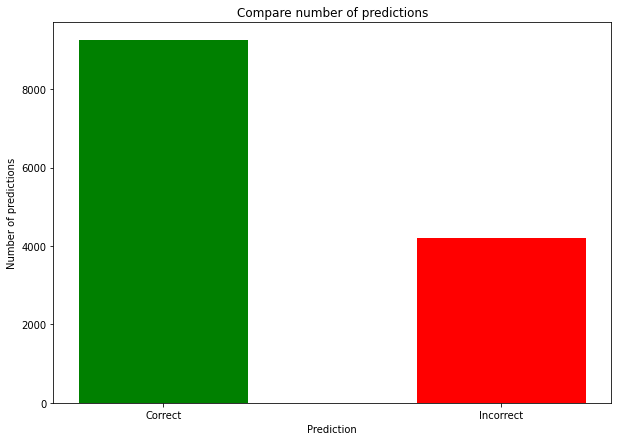

In [899]:
correct_pred = sum(y_pred == y_test)
incorrect_pred = sum(y_pred != y_test)

plt.figure(figsize=(10, 7))
plt.title('Compare number of predictions')
plt.xlabel('Prediction')
plt.ylabel('Number of predictions')
plt.bar(['Correct', 'Incorrect'], [correct_pred, incorrect_pred], width = 0.5, color = ['green', 'red'])
plt.show()

### Trả lời câu hỏi

- Từ mô hình có được, cảnh sát có thể dựa vào đó để nâng cao cảnh giác và kịp thời ứng phó đối với các vụ án phức tạp, đặc biệt là những vụ án liên quan đến súng ống.

---

## **Câu hỏi số 3**

- Các vụ án nào có thủ phạm là người trong gia đình?
- (Lợi ích của việc tìm câu trả lời cho câu hỏi này)

### Tiền xử lý

### Phân tích

### Trực quan hóa

### Trả lời câu hỏi

- (Nhập câu trả lời và giải thích)

---

## **Câu hỏi số 4**

- Nhóm đối tượng nào có thể gây ra giết người hàng loạt?
- (Lợi ích của việc tìm câu trả lời cho câu hỏi này)

### Tiền xử lý

### Phân tích

### Trực quan hóa

### Trả lời câu hỏi

- (Nhập câu trả lời và giải thích)

---

# **Đôi điều về đồ án**

- Mỗi thành viên gặp khó khăn gì?
- Mỗi thành viên học được những gì?
- Nếu có thêm thời gian, sẽ làm những gì?

---

# **Các nguồn tham khảo**

https://www.kaggle.com/code/nevil7/homicide-data-identifying-the-serial-killers